# 전처리

In [1]:
import numpy as np
import csv
#csv는 엑셀과 달리 , 를 통해 데이터를 구분

In [2]:
#given cities
cities = []
#solution
sol = []

# Euclidean distance measuring function

In [3]:
def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)

# 데이터를 가져오기 및 확인

In [4]:
with open('example_solution.csv', mode= 'r', newline = '') as solution:
    
    # mode r -> 읽기 모드이다
    #csv의 행단위로 데이터를 출력
    #각 line은 ㅣist형식으로 되어있다
    #newline = '' 데이터가 띄어쓰기 없이 들어간다

    #read solution sequence -> 즉 example_solution을 읽어드림
    reader = csv.reader(solution)
    for row in reader:
        #print(row[0]) #0행의 숫자들
        sol.append(int(row[0]))
        if(len(sol) < 10):
            print(sol[0:5])
    print('#########################################################################')
    print(sol[0:15])

[760]
[760, 21]
[760, 21, 950]
[760, 21, 950, 122]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
[760, 21, 950, 122, 807]
#########################################################################
[760, 21, 950, 122, 807, 4, 277, 423, 688, 241, 494, 605, 499, 527, 656]


# 2. get TSP city map

In [5]:
with open('TSP.csv', mode = 'r', newline='') as tsp:
    #마찬가지로 읽기 방식으로 TSP.csv를 가져온다 -> 0행에는 x좌표 1행에는 y 좌표가 들어 있음
    
    #read TSP city map
    reader = csv.reader(tsp)
    for row in reader: # -> 가로 축으로 읽으므로 각 열 별로[x,y] 형태로 들어가게 된다
        cities.append(row)
print('cities 에 들어간 원소의 개수 :',len(cities))
print(cities[:25])

cities 에 들어간 원소의 개수 : 1000
[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214'], ['45.263493711035', '24.433107718919345'], ['51.65884282004931', '90.10642634366273'], ['89.7286579150431', '69.21655768344208'], ['39.00003159887097', '80.55196125207841'], ['35.59526184197473', '14.05610647225216'], ['66.19318558706838', '55.68426760836053'], ['34.1551559598477', '85.84359753107817'], ['37.75840849411198', '8.948084373549136'], ['65.16521495804488', '93.65696789745532'], ['42.69022506258199', '92.09116283653597'], ['34.978245803048665', '90.63114224147267'], ['31.624449741999662', '37.20161513918061'], ['64.27557457661524', '47.52318749669915'], ['83.64758869867107', '0.8456953312116822'], ['66.90344399989151', '50.71682553053572'], ['16.884423905642787', '87.22366700571314'], ['87.5480501416314', '69.49436954110595'], ['5

# k-means

In [6]:
from sklearn.cluster import KMeans
k= 10 # 클러스터의 개수를 미리 지정(0~9)
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(cities)
print("y_pred의 개수 : ",len(y_pred))
print(y_pred[:50])

y_pred의 개수 :  1000
[4 7 5 3 5 4 9 2 9 4 8 6 4 9 9 9 1 8 0 8 6 2 8 3 0 6 1 6 1 4 2 2 0 7 2 2 2
 3 7 0 4 2 0 2 0 3 6 1 8 2]


In [7]:
kmeans.cluster_centers_

array([[82.83000993, 16.65437632],
       [14.51047099, 48.08816155],
       [84.51363855, 55.61390293],
       [42.20189796, 64.61510526],
       [42.18585866, 15.59170272],
       [83.73433052, 85.2295178 ],
       [16.94119418, 83.90369613],
       [11.4316226 , 16.80861859],
       [59.92967317, 39.39477765],
       [52.8449202 , 88.2341182 ]])

In [8]:
kmeans.cluster_centers_[0]

array([82.83000993, 16.65437632])

In [9]:
x_cen =[]
y_cen=[]
for i in range (0,10):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])
x_cen

[82.83000993060034,
 14.510470987106821,
 84.51363855288281,
 42.201897955128395,
 42.18585865501237,
 83.73433052350302,
 16.941194180290246,
 11.431622601192245,
 59.92967317137504,
 52.844920202491295]

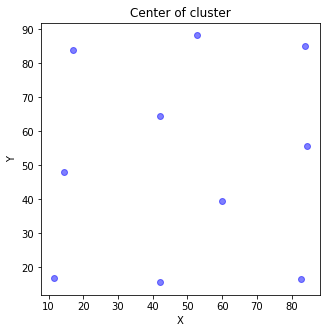

In [10]:
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5)) #그래프의 크기조절

#scatter plot 데이터를 생성
x = x_cen
y = y_cen


plt.scatter(x,y,c='b',alpha= 0.5) #->그래프의 객체 생성
#alpha는 점들의 크기 label은 설명란
#plt.legend(loc = 'upper right') #밑에 Scatter point 박스의 위치를 선정 
plt.xlabel('X') #--->x축의 제목
plt.ylabel('Y') #--->y축의 제목
plt.title("Center of cluster") # ---> 그래프 제목

plt.show()  #-> 그래프를 출력

# 데이터 분할

In [11]:
index_0 = []
index_1 = []
index_2 = []
index_3 = []
index_4 = []
index_5 = []
index_6 = []
index_7 = []
index_8 = []
index_9 = []
for idx in range (0,1000):
    if y_pred[idx] == 0:
        index_0.append(int(idx))
        
    elif y_pred[idx] == 1:
        index_1.append(int(idx))
        
    elif  y_pred[idx] == 2:
        index_2.append(int(idx))
        
    elif  y_pred[idx] == 3:
        index_3.append(int(idx))  
        
    elif  y_pred[idx] == 4:
        index_4.append(int(idx))     
        
    elif  y_pred[idx] == 5:
        index_5.append(int(idx))  
        
    elif  y_pred[idx] == 6:
        index_6.append(int(idx))
        
    elif  y_pred[idx] == 7:
        index_7.append(int(idx))
        
    elif  y_pred[idx] == 8:
        index_8.append(int(idx))
        
    else:
        index_9.append(int(idx))        
    

In [12]:
#이중배열로 해결해보자
index_total = []
index_total.append(index_0)
index_total.append(index_1)
index_total.append(index_2)
index_total.append(index_3)
index_total.append(index_4)
index_total.append(index_5)
index_total.append(index_6)
index_total.append(index_7)
index_total.append(index_8)
index_total.append(index_9)

In [13]:
print(index_total[5])

[2, 4, 52, 56, 61, 73, 76, 96, 97, 116, 119, 127, 131, 143, 150, 184, 196, 201, 203, 207, 225, 235, 239, 245, 253, 256, 258, 267, 271, 277, 284, 285, 286, 294, 306, 323, 327, 343, 352, 354, 357, 358, 382, 390, 404, 414, 434, 457, 490, 495, 516, 544, 562, 569, 572, 581, 672, 673, 689, 700, 717, 720, 723, 730, 760, 767, 771, 823, 834, 859, 867, 886, 887, 888, 901, 907, 909, 918, 920, 950, 957, 990]


In [14]:
print("index_0 : ",len(index_0), "\n","index_1 : ",len(index_1), "\n","index_2 : ",len(index_2), "\n","index_3 : ",len(index_3), "\n","index_4 : ",len(index_4), "\n",
      "index_5 : ",len(index_5), "\n","index_6 : ",len(index_6), "\n","index_7 : ",len(index_7), "\n","index_8 : ",len(index_8), "\n","index_9 : ",len(index_9))

index_0 :  125 
 index_1 :  113 
 index_2 :  102 
 index_3 :  96 
 index_4 :  102 
 index_5 :  82 
 index_6 :  106 
 index_7 :  93 
 index_8 :  100 
 index_9 :  81


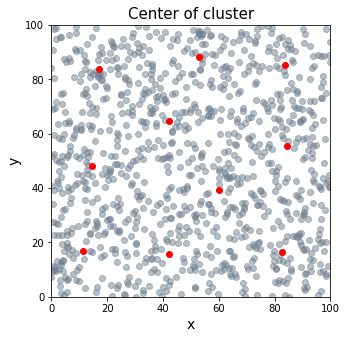

In [15]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("Center of cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

for idx in range(0,10):
    for m in index_total[idx]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")

plt.scatter(x_cen,y_cen,c='r') # cluster의 center를 빨강으로 표시

plt.show()




# 가시화

In [16]:
print(cities[:5])

[['53.25009344431329', '22.444885209100597'], ['21.570928175048255', '17.44707561216037'], ['72.16107675668404', '85.88179688723211'], ['52.59628100814437', '68.0997652916171'], ['99.55503411642916', '89.03868014012214']]


In [17]:
#print(index_0[2])
print(cities[index_0[2]])
print(cities[index_0[2]][0])

['96.65408150147886', '28.521667784013825']
96.65408150147886


In [18]:
print(index_total[5])
count=0
for i in index_total[5]:
    print(cities[i][0])
    count = count+1
    if count== 10:
        break

[2, 4, 52, 56, 61, 73, 76, 96, 97, 116, 119, 127, 131, 143, 150, 184, 196, 201, 203, 207, 225, 235, 239, 245, 253, 256, 258, 267, 271, 277, 284, 285, 286, 294, 306, 323, 327, 343, 352, 354, 357, 358, 382, 390, 404, 414, 434, 457, 490, 495, 516, 544, 562, 569, 572, 581, 672, 673, 689, 700, 717, 720, 723, 730, 760, 767, 771, 823, 834, 859, 867, 886, 887, 888, 901, 907, 909, 918, 920, 950, 957, 990]
72.16107675668404
99.55503411642916
80.93182208851377
83.76542944483452
73.76278722925055
79.87890457074937
71.72866435095176
69.89402193646147
70.83858789270664
76.48245644722068


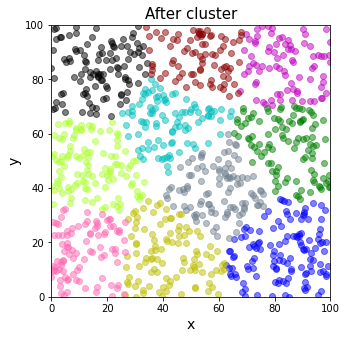

In [19]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="greenyellow")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="darkred")

#c = 'b,g,r,c,y,m,k,w'  -> color

#plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
#plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.show()




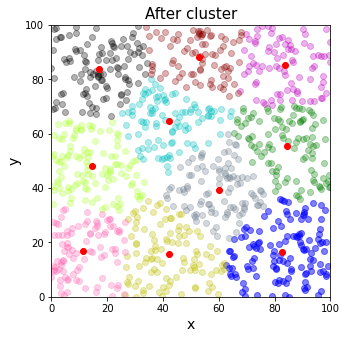

In [20]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="greenyellow")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="darkred")
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.show()  #-> 그래프를 출력
#c = 'b,g,r,c,y,m,k,w'  -> color



# Center 로만 생각

In [21]:
print("x_cen : ",x_cen)
print(" ")
print("y_cen : ",y_cen)

x_cen :  [82.83000993060034, 14.510470987106821, 84.51363855288281, 42.201897955128395, 42.18585865501237, 83.73433052350302, 16.941194180290246, 11.431622601192245, 59.92967317137504, 52.844920202491295]
 
y_cen :  [16.65437631618964, 48.08816155480108, 55.61390293100201, 64.61510525982236, 15.591702723764783, 85.2295178048073, 83.90369613468849, 16.808618593818707, 39.394777654605726, 88.23411820373732]


idea :결국엔 시작 노드와 가까운 순서대로 이동을 하게 되는데 path에 weight 존재    
즉, greedy search와 크게 차이 x

---------------------------------------------------------------------------------------------------------------------------

In [ ]:
Gre

In [23]:
#current_node에서 가장 가까운 좌표를 구해보자
kmeans.cluster_centers_

array([[82.83000993, 16.65437632],
       [14.51047099, 48.08816155],
       [84.51363855, 55.61390293],
       [42.20189796, 64.61510526],
       [42.18585866, 15.59170272],
       [83.73433052, 85.2295178 ],
       [16.94119418, 83.90369613],
       [11.4316226 , 16.80861859],
       [59.92967317, 39.39477765],
       [52.8449202 , 88.2341182 ]])

In [24]:
exp_1 =[1,3]
exp_2 =[5,0]

def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)

distance(exp_1,exp_2) # 기대값 5

5.0

# Deque 연습

In [26]:
from collections import deque
a =deque(['원래 맨앞',1,2,3,4,5,6,'원래 맨뒤'])
a.append('나중에 넣은거')
print(a)
print("pop left 한거 : ",a.popleft())
print("pop left 한 결과 : ",a)
print("pop 한거 : ",a.pop())
print("pop한 결과 : ",a)

deque(['원래 맨앞', 1, 2, 3, 4, 5, 6, '원래 맨뒤', '나중에 넣은거'])
pop left 한거 :  원래 맨앞
pop left 한 결과 :  deque([1, 2, 3, 4, 5, 6, '원래 맨뒤', '나중에 넣은거'])
pop 한거 :  나중에 넣은거
pop한 결과 :  deque([1, 2, 3, 4, 5, 6, '원래 맨뒤'])


In [27]:
from collections import deque
center_path = deque([])
center_path

deque([])

In [28]:
target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급

start_node_num = 0

#target_cluster = 조사할 cluster
#current_node_num = #현재까지 온 마지막 node의 번호
#path 지금까지의 경로

def greedy_search(target_cluster, start_node_num, path):
    if len(path)==0: #처음 집어 넣는 거
        path.append(start_node_num)
    else:
        current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
        #print(current_node_num)
        path.append(current_node_num) #path 는 그대로 있어야지
    
        min_distance = 10000 #아무리 멀어도 10000보다는 작음
    
         #current node는 가장 최근에 넣은 node
        for node_num in range(0,len(target_cluster)): # 0~ 클러스터 개수 - 1 까지 
            if (current_node_num == node_num): #자기 자신은 예외처리
                pass
            else:
                if node_num in path:
                    pass
                else:
                    if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                        next_node_num = node_num
                        min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                        #print(min_distance)
                    else:
                        pass
        
        path.append(next_node_num) #갱신
       
    
    
    return path

greedy_search(target_cluster,start_node_num,center_path)
print(center_path)
        

deque([0])


In [29]:
greedy_search(target_cluster,start_node_num,center_path)
print(center_path)

deque([0, 8])


In [30]:
from collections import deque
center_path = deque([])
target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급
start_node_num = 0

#target_cluster = 조사할 cluster
#current_node_num = #현재까지 온 마지막 node의 번호
#path 지금까지의 경로

def greedy_path2(target_cluster, start_node_num, path):
    
    for i in range(0,len(target_cluster)):
        
        if len(path)==0: #처음 집어 넣는 거
            path.append(start_node_num)
        else:
            current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
            #print(current_node_num)
            path.append(current_node_num) #path 는 그대로 있어야지
    
            min_distance = 10000 #아무리 멀어도 10000보다는 작음
    
             #current node는 가장 최근에 넣은 node
            for node_num in range(0,len(target_cluster)): # 0~ 클러스터 개수 - 1 까지 
                if (current_node_num == node_num): #자기 자신은 예외처리
                    pass
                else:
                    if node_num in path:
                        pass
                    else:
                        if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                            next_node_num = node_num
                            min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                            #print(min_distance)
                        else:
                            pass
        
            path.append(next_node_num) #갱신
       
    
    
    return path

greedy_path2(target_cluster,start_node_num,center_path)
print(center_path)
        

deque([0, 8, 2, 5, 9, 3, 6, 1, 7, 4])


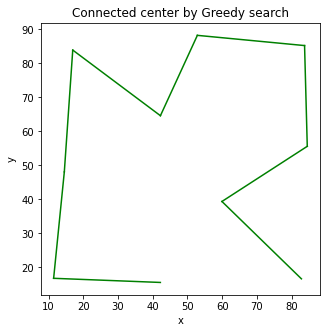

In [31]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected center by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(kmeans.cluster_centers_[center_path[i]][0]))
    y.append(float(kmeans.cluster_centers_[center_path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

    

plt.show()  #-> 그래프를 출력

In [32]:
print(x)

[82.83000993060034, 59.92967317137504, 84.51363855288281, 83.73433052350302, 52.844920202491295, 42.201897955128395, 16.941194180290246, 14.510470987106821, 11.431622601192245, 42.18585865501237]


In [33]:
center_path

deque([0, 8, 2, 5, 9, 3, 6, 1, 7, 4])

In [34]:
y_pred[:10]

array([4, 7, 5, 3, 5, 4, 9, 2, 9, 4])

# 10개의 Cluster 중에서 한 개에 focus 맞춘 다음 확장하자

(0번째 cluster가 시작이라고 가정하고 0번째 cluster만 집중해보자)

In [49]:
pos_0 = [i for i, x in enumerate(y_pred) if x == 0]
print(y_pred[pos_0]) #잘 묵였는지 확인
pos_0[:10]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[18, 24, 32, 39, 42, 44, 53, 59, 71, 75]

In [50]:
new_cluster  = []
np_cities = np.array(cities).astype('float64')

for idx in pos_0:
    new_cluster.append((np_cities[idx]).astype('float64'))
new_cluster[:10]

[array([83.6475887 ,  0.84569533]),
 array([90.03244482, 29.95049463]),
 array([96.6540815 , 28.52166778]),
 array([74.27810748, 20.09927588]),
 array([84.87799672, 34.74062283]),
 array([85.66460122, 28.6646551 ]),
 array([63.60814123, 16.87869137]),
 array([95.66942872, 21.16963159]),
 array([98.10751965, 32.01434249]),
 array([73.80857212,  0.76710561])]

In [51]:
#overloading
def greedy_path(target_cluster, start_node_num, path,target_cluster_idx):
    
    next_node_num = 777777777777 #이거 들어가면 오류뜨게 하려고
    
    #클러스터 별로 탐색
    for i in  target_cluster_idx: 
        
        if len(path)==0: #처음 집어 넣는 거
            path.append(start_node_num)    # path = [start_node_num] 
        else:
            
                                          #path = [start_node_num , 0 ,1, 2, 3] 이라 가정
            current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장  ----> 3 
                                          #path = [start_node_num, 0 ,1 ,2]
            path.append(current_node_num) #path 는 그대로 있어야지 path [start_node_num , 0, 1, 2, 3]
    
            min_distance = 10000 #아무리 멀어도 10000보다는 작음
            
             #current node는 가장 최근에 넣은 node ---->3
            
            #제일 가까운 노드를 찾는 코드
            for node_num in target_cluster_idx: # 모든 클러스터들 방문
                if (current_node_num == node_num): #자기 자신은 예외처리
                    pass
                else:
                    if node_num in path:
                        pass
                    else:
                        if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                            next_node_num = node_num
                            min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                            #print(min_distance)
                        else:
                            pass
            
            path.append(next_node_num) #갱신
       
    
    
    return path

In [52]:
#greedy_path(target_cluster, start_node_num, path)
#target_cluster = 조사할 cluster
#current_node_num = #현재까지 온 마지막 node의 번호
#path 지금까지의 경로

target_cluster = np_cities
path_0 =[]
start_node_num = pos_0[0] # 겹치면 어쩌피 0
cluster_number_0 = 0
start_node = kmeans.cluster_centers_[cluster_number_0]


greedy_path(target_cluster, start_node_num, path_0,pos_0)
path_0

[18,
 505,
 295,
 519,
 249,
 787,
 683,
 728,
 985,
 603,
 687,
 198,
 215,
 305,
 766,
 288,
 650,
 996,
 969,
 880,
 599,
 553,
 259,
 244,
 173,
 591,
 463,
 705,
 411,
 557,
 904,
 473,
 412,
 846,
 532,
 472,
 299,
 640,
 514,
 405,
 407,
 317,
 400,
 935,
 109,
 136,
 806,
 883,
 839,
 243,
 89,
 809,
 509,
 366,
 820,
 99,
 59,
 200,
 583,
 32,
 71,
 162,
 423,
 180,
 936,
 625,
 24,
 236,
 649,
 681,
 44,
 163,
 536,
 42,
 668,
 385,
 232,
 356,
 147,
 321,
 998,
 340,
 248,
 176,
 613,
 186,
 682,
 984,
 678,
 53,
 785,
 151,
 443,
 847,
 892,
 478,
 842,
 117,
 578,
 214,
 991,
 688,
 872,
 165,
 75,
 903,
 788,
 403,
 498,
 530,
 424,
 905,
 369,
 555,
 676,
 776,
 204,
 39,
 384,
 970,
 341,
 926,
 512,
 964,
 725]

In [53]:
cities[path_0[0]][0]

'83.64758869867107'

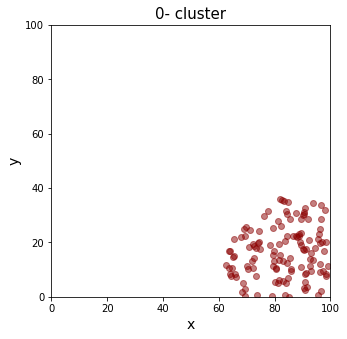

In [54]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("0- cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

for m in path_0:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="darkred")

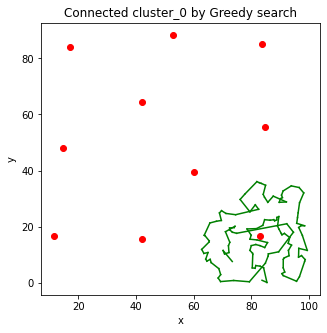

In [56]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected cluster_0 by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(path_0)):
    x.append(float(cities[path_0[i]][0]))
    y.append(float(cities[path_0[i]][1]))

for i in range (0,len(path_0)-1): #(두개씩묶으므로
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")
    

    

plt.show()  #-> 그래프를 출력

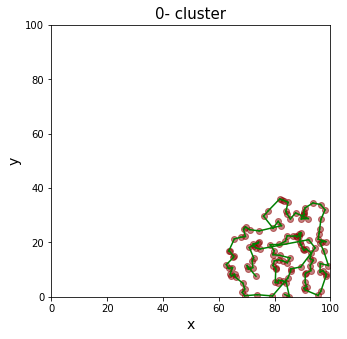

In [57]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.title("0- cluster", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

for m in path_0:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="darkred")
    

x = []
y = []

for i in range (0,len(path_0)):
    x.append(float(cities[path_0[i]][0]))
    y.append(float(cities[path_0[i]][1]))

for i in range (0,len(path_0)-1): #(두개씩묶으므로
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")
    

    

plt.show()  #-> 그래프를 출력

In [58]:
target_cluster = np_cities
path =[]
for number_of_cluster in center_path: #0~10 까지 위의 루트대로 
    
    temp_pos = [i for i, x in enumerate(y_pred) if x == number_of_cluster] #각 cluster의 index 가 저장돤다
    np_cities = np.array(cities).astype('float64')



    start_node_num = temp_pos[0] # 겹치면 어쩌피 0
    cluster_number = number_of_cluster
    start_node = kmeans.cluster_centers_[cluster_number]


    path =greedy_path(target_cluster, start_node_num, path,temp_pos)
    #print(path)
    
    
len(path)

1000

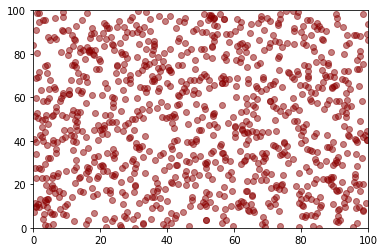

In [59]:
plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

for m in path:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="darkred")
    

In [60]:
print(len(path))
len(target_cluster)

1000


1000

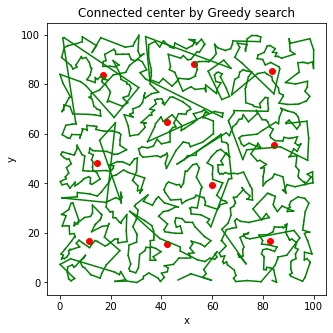

In [62]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시
plt.title("Connected center by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

    

plt.show()  #-> 그래프를 출력

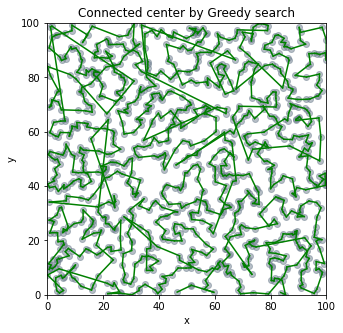

In [63]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정
plt.title("Connected center by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")



for idx in range(0,10):
    for m in index_total[idx]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c="slategray")
    

plt.show()  #-> 그래프를 출력

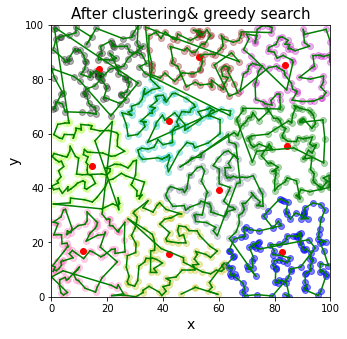

In [64]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    
plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("After clustering& greedy search", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

x_0=[]
y_0=[]
for m in index_total[0]:
    x_0.append(float(cities[m][0]))
    y_0.append(float(cities[m][1]))

plt.scatter(x_0,y_0,alpha=0.5, c="b")

for m in index_total[1]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="greenyellow")
for m in index_total[2]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="g")
for m in index_total[3]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="c")
for m in index_total[4]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="y")
for m in index_total[5]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="m")
for m in index_total[6]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="k")
for m in index_total[7]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="hotpink")
for m in index_total[8]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="slategray")
for m in index_total[9]:
    plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.3, c="darkred")
plt.scatter(x_cen,y_cen,c='r',alpha= 1) # cluster의 center를 빨강으로 표시

#c = 'b,g,r,c,y,m,k,w'  -> color


for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")
    
plt.show()  #-> 그래프를 출력

In [65]:
def cal_cost(my_path):
    dist = 0
    for idx in range (0,len(my_path)):
        if (idx == len(my_path)-1):
            pass #path의 맨끝에는 생략
        else:
            dist = dist + distance(np_cities[my_path[idx]],np_cities[my_path[idx+1]])
    dist = dist + distance(np_cities[my_path[0]],np_cities[my_path[len(my_path)-1]]) #마지막 돌아오는거 추가
    return dist

cal_cost(path)        

3005.6749874055563